In [51]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_table("wine.txt",sep="\t")

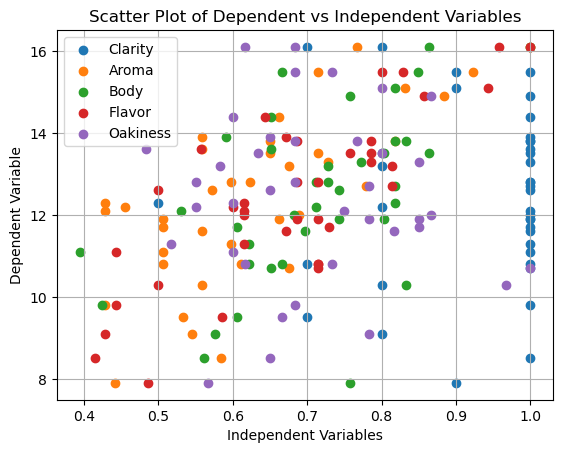

In [19]:
#exploratory analysis
import matplotlib.pyplot as plt
import numpy as np
#plot quality against the quantitative as scatter plots and as a histogram for the qualitative
independent_vars = df.columns[1:]
df_quant = df.drop(columns=["Region"])
for col in df_quant.columns[:-1]:
    plt.scatter(df_quant[col]/df_quant[col].max(), df['Quality'], label=col)
plt.xlabel('Independent Variables')
plt.legend()
plt.ylabel('Dependent Variable')
plt.title('Scatter Plot of Dependent vs Independent Variables')
plt.grid(True)
plt.show()
#notes
#clarity seems to be the least correlated w/ the quality of the wine, it also seems to be a quasi-factor variable in itself
#the other variables are visually similar in their plot

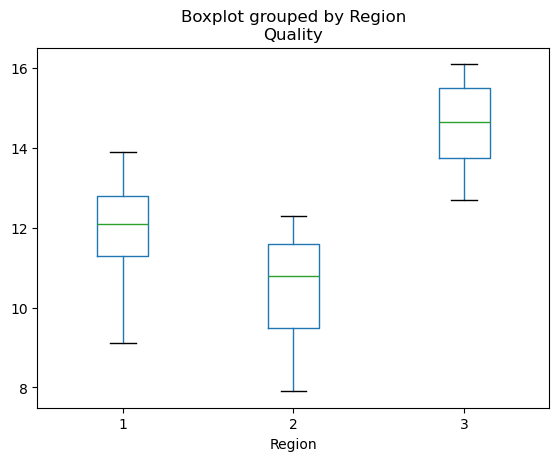

In [86]:
df.boxplot(column='Quality',by='Region', grid=False)
plt.show()
#Region three is the strongest wine producer, and region 2 is the worst

<Axes: title={'center': 'Quality'}, xlabel='Clarity'>

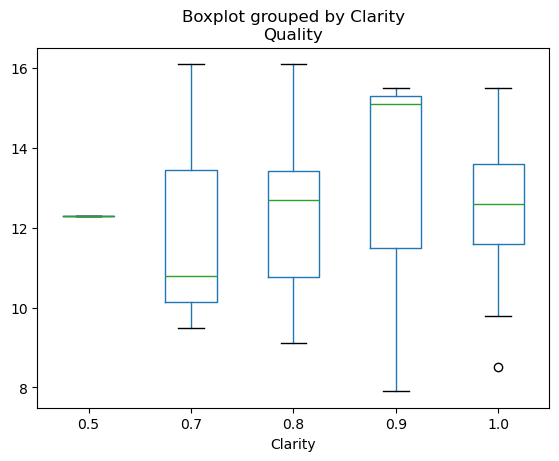

In [42]:
df.boxplot(column='Quality', by='Clarity', grid = False)

0.0008089078989993448


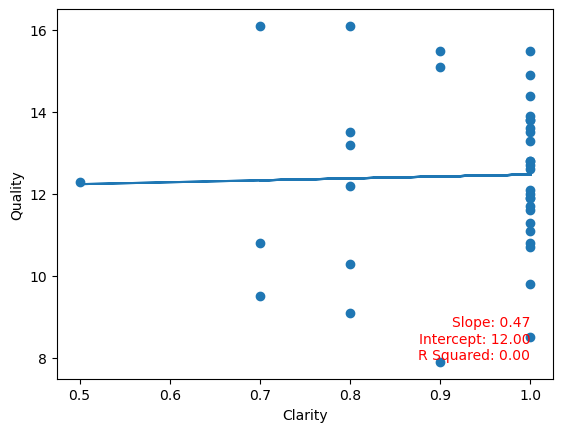

0.5003076989261046


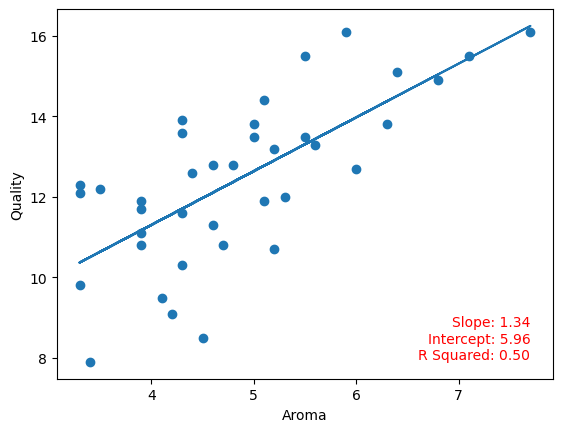

0.3010740961175522


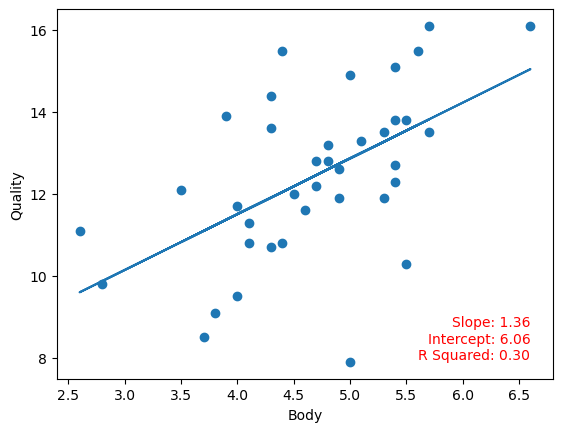

0.6241744751817517


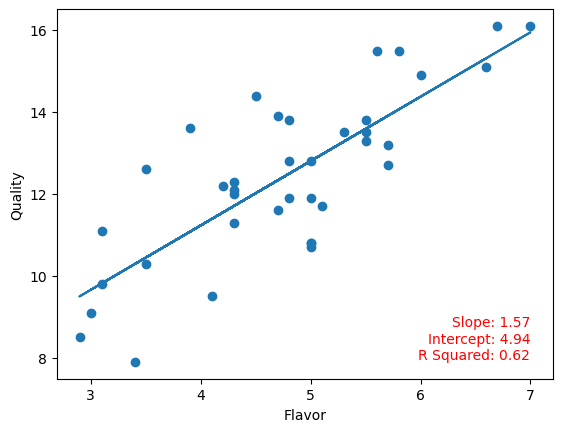

0.002212806106235754


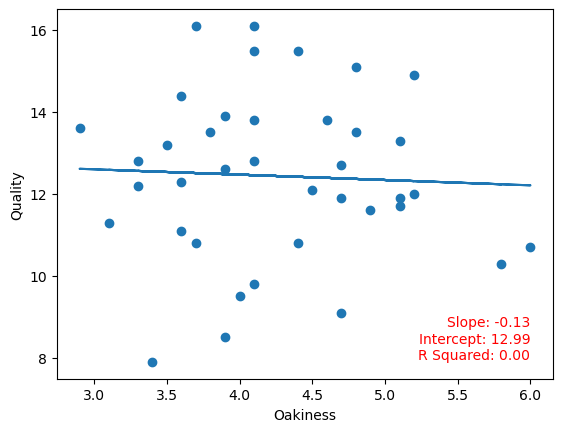

In [65]:
#15 a)
from sklearn.linear_model import LinearRegression
regressions = []
for col in df_quant.columns[:-1]:
    X = df_quant[[col]]
    y = df_quant["Quality"]
    reg = LinearRegression().fit(X, y)
    regressions.append(reg)
    plt.scatter(df_quant[col], df['Quality'], label=col)
    slope = reg.coef_[0]
    intercept = float(reg.intercept_)
    plt.plot(X, reg.predict(X))
    score = reg.score(X, y)
    plt.ylabel("Quality")
    plt.xlabel(col)
    plt.text(X.max(), y.min(), f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR Squared: {score:.2f}', fontsize=10, color='red',ha='right', va='bottom') # Align to bottom right
    plt.show()

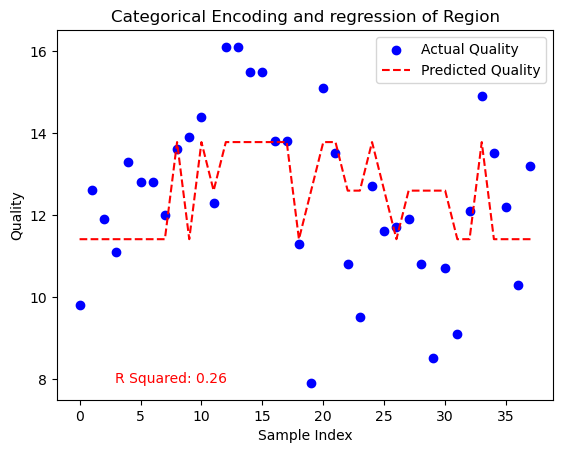

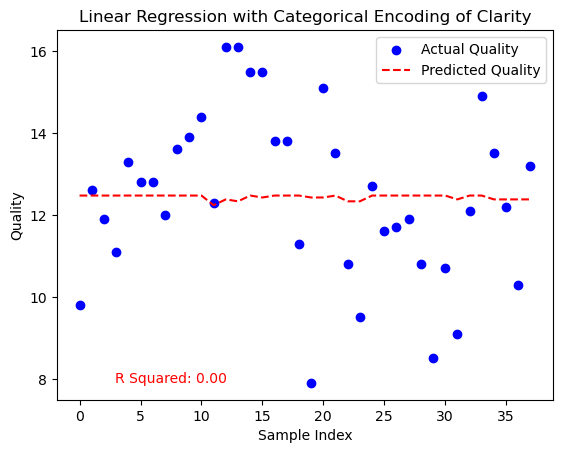

In [88]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(df[['Clarity']])
encoded_data = ohe.fit_transform(df[['Region']])

reg = LinearRegression().fit(df[['Region']], df[['Quality']])
y_hat = reg.predict(df[['Region']])
score = reg.score(df[['Region']],df[['Quality']] )

plt.scatter(range(len(df['Quality'])), df['Quality'], color='blue', label='Actual Quality')
plt.plot(range(len(df['Quality'])), y_hat, color='red', label='Predicted Quality', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Quality')
plt.title('Categorical Encoding and regression of Region')
plt.text(X.min(), y.min(), f'\nR Squared: {score:.2f}', fontsize=10, color='red') 
plt.legend()
plt.show()

reg = LinearRegression().fit(df[['Clarity']], df[['Quality']])
y_hat = reg.predict(df[['Clarity']])

score = reg.score(df[['Clarity']],df[['Quality']] )
plt.scatter(range(len(df['Quality'])), df['Quality'], color='blue', label='Actual Quality')
plt.plot(range(len(df['Quality'])), y_hat, color='red', label='Predicted Quality', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Quality')
plt.title('Linear Regression with Categorical Encoding of Clarity')
plt.text(X.min(), y.min(), f'\nR Squared: {score:.2f}', fontsize=10, color='red') 

plt.legend()
plt.show()